<a href="https://colab.research.google.com/github/mdhasanali3/loan_risk_check/blob/main/lrf_outlier_removed_%26_have_all_plot_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Problem Statement
 Bank or Lenders needs to verify customer identity. They calculate credit   score for checking eligiblity. But nowdays loan applicant number rising so much.Manullay verifying too many customer is  time consuming and cause human error problem. 


 Consumers lost nearly $3.3 billion collectively to fraudulent practices in 2020, according to the Federal Trade Commission.[1] 
# Problem Outcome
We are focusing on salaried professionals fraud detection. 
We will calculate credit score as bank officials do. Then we will check those with previous data. And suggest them how much risk for particular applicant.


Benefit of this process:
1. Less time for customer eligiblity check no human error.
2. Transparency in giving loan.
3. Help to make more robust decision for Bank like customer grouping. 

# Dataset Details
Our dataset is based on USA.Total 49 state, total record 50000
,total column or feature 32.



  For dataset more details please check this link[2]


# Dataset Problem
Dataset have some missing value around 6521. 
We have tried to fill those missing value via 
1. Remove all record that contain null value
2. Replace those null with mean for numerical feature and mode for categorical feature
3. checking muticolinearity not completed

After some analysis we decided to drop all null record.
# Answer all the question
- Which feature is considering for giving loan?

Initially we selected 14 feature for counting credit score. 

Those features are:

    1. income
	2. totalRevBal
	3. debtIncRat
	4. avgBal
	5. reason
	6. term 
	7. totalBal
	8. openAcc
	9. pubRec
	10.totalAcc
	11. delinq2yr
	12. accOpen24
	13. bcRatio
	14. totalLim


- How can a customer be segmented?


Once we get credit score then we can easily use any cluster algorithm for segmentation purpose.

- What is the credit score?

The amount of debt applicant have accrued, 

What has been applicant track record for paying off applicant loans, 

How frequently applicant repaid credit card debt, 

How many EMIs were missed in last 2 years, 

How much average balance per account , 

His current income , reason for loan application,
– all these factors impact the credit score.

- Grouping loan customer according their region/state/city?

After counting credit score we can do this type of grouping

- How can loan eligibility checked from previous record?


From our previous dataset we will train model. For inferencing we will take validated data from bank official via any api or form then we will show them risk of particular applicant.


We can handle stream and batch both type of data.

Also we will update our model by active learning.

Also as bank is a very dynamic sector we will perform adversarial model for better fraud detection.


Reference: 
1.https://www.bankrate.com/loans/personal-loans/personal-loan-scam-signs/
2.https://datascienceuwl.github.io/Project2018/TheData.html

# notebook details
1. import
2. dataset summery

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# importing necessary liabraries


In [2]:
import os
import pandas as pd  # First, we'll import Pandas, a data processing and CSV file I/O library
import numpy as np
from datetime import datetime

from sklearn import preprocessing,metrics 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


 reading dataset
 dataset source
 
https://datascienceuwl.github.io/Project2018/TheData.html


After reading the dataset we found some valuable insights.

Total row  		 50000
Total column     	 32

Total 22 floating type feature , 1 integer type feature , total 9 object type feature

Initial Insight from dataset:

null value contain columns are

1. employment
2. length
3. revolRatio
4. bcOpen
5. bc Ratio


 
total missing values :   6521



In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#'/content/drive/MyDrive/Brain_Station_23/RnD_Lab/
df_loan = pd.read_csv('loans50k.csv', encoding='latin-1')
df_loan.head() # Output the first five rows.

loanID   amount        term  rate  payment grade          employment  \
0  188861   8000.0   36 months  0.14   272.07     C       Warehouseman    
1  517703  11000.0   36 months  0.10   354.89     B      Vice President   
2  268587  35000.0   36 months  0.15  1220.33     D      Owner/Attorney   
3  579902  20000.0   60 months  0.12   447.83     C             Analyst   
4  617630  12000.0   60 months  0.12   266.88     B  medical technician   

      length      home    income         verified       status  \
0    3 years      RENT   49966.0  Source Verified  Charged Off   
1  10+ years  MORTGAGE   50000.0     Not Verified   Fully Paid   
2  10+ years      RENT  360000.0         Verified      Current   
3    2 years  MORTGAGE   60000.0  Source Verified   Fully Paid   
4  10+ years  MORTGAGE   64000.0  Source Verified      Current   

               reason state  debtIncRat  delinq2yr  inq6mth  openAcc  pubRec  \
0         credit_card    CA       30.05        0.0      0.0     11.0     0.0   
1  debt_consolidation    PA        8.74        0.0      2.0     12.0     0.0   
2  debt_consolidation    CA       14.50        0.0      1.0      8.0     0.0   
3  debt_consolidation    CA       14.14        0.0      0.0     12.0     3.0   
4  debt_consolidation    NJ        5.14        0.0      0.0      8.0     0.0   

   revolRatio  totalAcc    totalPaid  totalBal  totalRevLim  accOpen24  \
0        0.55      15.0   5914.67000   48054.0       8100.0        8.0   
1        0.36      15.0  12024.75000  265838.0      33400.0        4.0   
2        0.83      14.0  31668.65000  850150.0      83000.0        2.0   
3        0.01      48.0  23827.22901   20671.0      14200.0        8.0   
4        0.58      22.0   9599.69000  128034.0      14600.0        3.0   

     avgBal   bcOpen  bcRatio  totalLim  totalRevBal  totalBcLim  totalIlLim  
0    4369.0     43.0     95.7   60629.0      48054.0      1000.0     52529.0  
1   22153.0  19756.0     37.5  297500.0      11844.0     31600.0         0.0  
2  121450.0   7686.0     83.2  907300.0     173260.0     83000.0    100000.0  
3    1723.0  11061.0      1.2   46964.0      20671.0     11200.0     32764.0  
4   18291.0   5904.0     58.4  134600.0       8475.0     14200.0         0.0

# dataset summery 





In [5]:
print(df_loan,5)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## dataset descriptive information


In [6]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loanID       50000 non-null  int64  
 1   amount       49999 non-null  float64
 2   term         49999 non-null  object 
 3   rate         49999 non-null  float64
 4   payment      49999 non-null  float64
 5   grade        49999 non-null  object 
 6   employment   47215 non-null  object 
 7   length       47319 non-null  object 
 8   home         49999 non-null  object 
 9   income       49999 non-null  float64
 10  verified     49999 non-null  object 
 11  status       49999 non-null  object 
 12  reason       49999 non-null  object 
 13  state        49999 non-null  object 
 14  debtIncRat   49999 non-null  float64
 15  delinq2yr    49999 non-null  float64
 16  inq6mth      49999 non-null  float64
 17  openAcc      49999 non-null  float64
 18  pubRec       49999 non-null  float64
 19  revo

Insights
* total 22 floating type feature
* total 1 integer type feature
* total 9 object type feature

In [7]:
df_loan.describe()

loanID        amount          rate       payment        income  \
count   50000.000000  49999.000000  49999.000000  49999.000000  4.999900e+04   
mean   327093.454600  15145.527911      0.130407    442.737519  7.617379e+04   
std    189495.851384   8527.772776      0.044192    244.835744  6.523503e+04   
min        16.000000   1000.000000      0.050000     30.540000  4.000000e+03   
25%    163310.250000   8500.000000      0.100000    265.840000  4.623850e+04   
50%    324662.500000  13800.000000      0.130000    385.790000  6.500000e+04   
75%    491706.250000  20000.000000      0.160000    578.680000  9.000000e+04   
max    656728.000000  35000.000000      0.290000   1407.010000  7.446395e+06   

         debtIncRat     delinq2yr       inq6mth       openAcc        pubRec  \
count  49999.000000  49999.000000  49999.000000  49999.000000  49999.000000   
mean      18.731157      0.346167      0.639553     11.849217      0.232925   
std        8.444506      0.907636      0.938869      5.524801      0.624342   
min        0.000000      0.000000      0.000000      1.000000      0.000000   
25%       12.390000      0.000000      0.000000      8.000000      0.000000   
50%       18.210000      0.000000      0.000000     11.000000      0.000000   
75%       24.730000      0.000000      1.000000     15.000000      0.000000   
max       61.210000     15.000000      6.000000     76.000000     28.000000   

         revolRatio      totalAcc     totalPaid      totalBal   totalRevLim  \
count  49981.000000  49999.000000  49999.000000  4.999900e+04  4.999900e+04   
mean       0.546419     25.749595  14612.566370  1.397782e+05  3.243594e+04   
std        0.236451     12.097421   9386.538643  1.526384e+05  3.269753e+04   
min        0.000000      3.000000      0.000000  0.000000e+00  0.000000e+00   
25%        0.370000     17.000000   7605.040000  3.061900e+04  1.400000e+04   
50%        0.550000     24.000000  12404.910000  8.107300e+04  2.400000e+04   
75%        0.730000     33.000000  19665.062115  2.094385e+05  4.030000e+04   
max        1.670000    162.000000  58697.442090  2.552960e+06  1.060800e+06   

          accOpen24         avgBal         bcOpen       bcRatio      totalLim  \
count  49999.000000   49999.000000   49511.000000  49479.000000  4.999900e+04   
mean       4.557831   13189.526651    9154.930945     63.188468  1.718866e+05   
std        3.079680   15561.787118   14296.865563     27.205695  1.697017e+05   
min        0.000000       0.000000       0.000000      0.000000  6.000000e+02   
25%        2.000000    3170.000000    1235.000000     43.100000  5.000100e+04   
50%        4.000000    7356.000000    4052.000000     67.100000  1.120710e+05   
75%        6.000000   18223.500000   10868.500000     87.000000  2.498060e+05   
max       50.000000  358652.000000  373005.000000    161.000000  2.711061e+06   

        totalRevBal     totalBcLim    totalIlLim  
count  4.999900e+04   49999.000000  4.999900e+04  
mean   5.088178e+04   21190.290466  4.244567e+04  
std    4.731099e+04   21250.776922  4.329564e+04  
min    0.000000e+00       0.000000  0.000000e+00  
25%    2.211000e+04    7500.000000  1.500000e+04  
50%    3.862600e+04   14700.000000  3.200000e+04  
75%    6.390300e+04   27600.000000  5.679400e+04  
max    1.094819e+06  560800.000000  1.027358e+06

### data quality check
#### dataset shape

#### null values

In [8]:
print("row  ",df_loan.shape[0])
print("col    ",df_loan.shape[1])
print("missing   \n",df_loan.isnull().sum())

row   50000
col     32
missing   
 loanID            0
amount            1
term              1
rate              1
payment           1
grade             1
employment     2785
length         2681
home              1
income            1
verified          1
status            1
reason            1
state             1
debtIncRat        1
delinq2yr         1
inq6mth           1
openAcc           1
pubRec            1
revolRatio       19
totalAcc          1
totalPaid         1
totalBal          1
totalRevLim       1
accOpen24         1
avgBal            1
bcOpen          489
bcRatio         521
totalLim          1
totalRevBal       1
totalBcLim        1
totalIlLim        1
dtype: int64


Insights


---


null value contain col are
* employment
* length
* revolRatio
* bcOpen
* bc Ratio


#### column list
### unique values each columns
#### total missing values





In [9]:
df_loan.nunique()

loanID         50000
amount          1254
term               2
rate              25
payment        15328
grade              7
employment     21400
length            11
home               3
income          4990
verified           3
status             7
reason            13
state             49
debtIncRat      3927
delinq2yr         16
inq6mth            7
openAcc           58
pubRec            16
revolRatio       123
totalAcc         102
totalPaid      47665
totalBal       45093
totalRevLim     2946
accOpen24         33
avgBal         24328
bcOpen         19590
bcRatio         1114
totalLim       42726
totalRevBal    39388
totalBcLim      1877
totalIlLim     33042
dtype: int64

## dropping null records


In [10]:
grade_loan=df_loan.copy()

In [11]:
grade_loan = grade_loan.dropna() 
df_loan = df_loan.dropna() 

## deleteing some irrelevent columns


In [12]:
del_col=['state','status','verified','employment']
grade_loan=grade_loan.drop(labels= del_col,axis=1)

In [13]:
grade_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46714 entries, 0 to 49998
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loanID       46714 non-null  int64  
 1   amount       46714 non-null  float64
 2   term         46714 non-null  object 
 3   rate         46714 non-null  float64
 4   payment      46714 non-null  float64
 5   grade        46714 non-null  object 
 6   length       46714 non-null  object 
 7   home         46714 non-null  object 
 8   income       46714 non-null  float64
 9   reason       46714 non-null  object 
 10  debtIncRat   46714 non-null  float64
 11  delinq2yr    46714 non-null  float64
 12  inq6mth      46714 non-null  float64
 13  openAcc      46714 non-null  float64
 14  pubRec       46714 non-null  float64
 15  revolRatio   46714 non-null  float64
 16  totalAcc     46714 non-null  float64
 17  totalPaid    46714 non-null  float64
 18  totalBal     46714 non-null  float64
 19  tota

In [14]:
grade_loan.describe()

loanID        amount          rate       payment        income  \
count   46714.000000  46714.000000  46714.000000  46714.000000  4.671400e+04   
mean   326901.441431  15342.429464      0.130209    447.475290  7.755333e+04   
std    189922.890203   8542.639785      0.044255    245.254445  6.630007e+04   
min        16.000000   1000.000000      0.050000     30.540000  1.000000e+04   
25%    161636.250000   9000.000000      0.100000    269.520000  4.800000e+04   
50%    325205.000000  14000.000000      0.130000    391.280000  6.500000e+04   
75%    492359.000000  20000.000000      0.160000    586.745000  9.200000e+04   
max    656727.000000  35000.000000      0.290000   1407.010000  7.446395e+06   

         debtIncRat     delinq2yr       inq6mth       openAcc        pubRec  \
count  46714.000000  46714.000000  46714.000000  46714.000000  46714.000000   
mean      18.677516      0.346705      0.641157     11.972171      0.225350   
std        8.410715      0.907830      0.940866      5.545394      0.613409   
min        0.000000      0.000000      0.000000      1.000000      0.000000   
25%       12.360000      0.000000      0.000000      8.000000      0.000000   
50%       18.150000      0.000000      0.000000     11.000000      0.000000   
75%       24.640000      0.000000      1.000000     15.000000      0.000000   
max       61.210000     15.000000      6.000000     76.000000     28.000000   

         revolRatio      totalAcc     totalPaid      totalBal   totalRevLim  \
count  46714.000000  46714.000000  46714.000000  4.671400e+04  4.671400e+04   
mean       0.548448     25.847776  14810.810369  1.424781e+05  3.271266e+04   
std        0.235892     12.115766   9420.487502  1.537507e+05  3.217022e+04   
min        0.000000      3.000000      0.000000  0.000000e+00  3.000000e+02   
25%        0.370000     17.000000   7772.738393  3.173225e+04  1.430000e+04   
50%        0.550000     24.000000  12632.952945  8.426600e+04  2.430000e+04   
75%        0.730000     33.000000  19974.226065  2.129392e+05  4.070000e+04   
max        1.670000    162.000000  58697.442090  2.552960e+06  1.013700e+06   

          accOpen24         avgBal         bcOpen       bcRatio      totalLim  \
count  46714.000000   46714.000000   46714.000000  46714.000000  4.671400e+04   
mean       4.577621   13308.496425    9144.511153     63.353772  1.748247e+05   
std        3.081678   15535.903900   14171.693125     27.134613  1.707713e+05   
min        0.000000       0.000000       0.000000      0.000000  7.000000e+02   
25%        2.000000    3250.000000    1243.250000     43.400000  5.152150e+04   
50%        4.000000    7536.500000    4077.000000     67.300000  1.152945e+05   
75%        6.000000   18419.750000   10915.750000     87.100000  2.536075e+05   
max       50.000000  358652.000000  373005.000000    161.000000  2.661185e+06   

         totalRevBal     totalBcLim     totalIlLim  
count   46714.000000   46714.000000   46714.000000  
mean    52023.914158   21531.246157   43545.898189  
std     47351.460193   21072.456424   43528.790210  
min         0.000000       0.000000       0.000000  
25%     22904.250000    7800.000000   16000.000000  
50%     39601.000000   15100.000000   33000.000000  
75%     65289.000000   28000.000000   58169.500000  
max    928934.000000  373100.000000  689474.000000

In [15]:
print("row  ",grade_loan.shape[0])
print("col    ",grade_loan.shape[1])
print("missing   \n",grade_loan.isnull().sum())

row   46714
col     28
missing   
 loanID         0
amount         0
term           0
rate           0
payment        0
grade          0
length         0
home           0
income         0
reason         0
debtIncRat     0
delinq2yr      0
inq6mth        0
openAcc        0
pubRec         0
revolRatio     0
totalAcc       0
totalPaid      0
totalBal       0
totalRevLim    0
accOpen24      0
avgBal         0
bcOpen         0
bcRatio        0
totalLim       0
totalRevBal    0
totalBcLim     0
totalIlLim     0
dtype: int64


In [16]:
print ("\nfeatures/columns : \n" ,grade_loan.columns.tolist())
print ("\nunique values :  \n",grade_loan.nunique())
print ("\ntotal missing values :  ", grade_loan.isnull().sum().values.sum())


features/columns : 
 ['loanID', 'amount', 'term', 'rate', 'payment', 'grade', 'length', 'home', 'income', 'reason', 'debtIncRat', 'delinq2yr', 'inq6mth', 'openAcc', 'pubRec', 'revolRatio', 'totalAcc', 'totalPaid', 'totalBal', 'totalRevLim', 'accOpen24', 'avgBal', 'bcOpen', 'bcRatio', 'totalLim', 'totalRevBal', 'totalBcLim', 'totalIlLim']

unique values :  
 loanID         46714
amount          1251
term               2
rate              25
payment        14592
grade              7
length            11
home               3
income          4288
reason            13
debtIncRat      3912
delinq2yr         16
inq6mth            7
openAcc           58
pubRec            16
revolRatio       121
totalAcc         102
totalPaid      44627
totalBal       42500
totalRevLim     2850
accOpen24         33
avgBal         23515
bcOpen         19018
bcRatio         1111
totalLim       40431
totalRevBal    37441
totalBcLim      1839
totalIlLim     31668
dtype: int64

total missing values :   0


### Data Transformation
> Grade - Borrower's grade given basing on his/her past history - encoded to numerical values.

> home_ownership - this is feature in the dataset which had to be encoded to numerical values.

> Emp_Length - this feature was not formatted properly. It has some values which was in the format like "10+years","5years"...etc. we changed them to numerical values in the below cell.

In [17]:
#Data encoding
grade_loan['term'] = grade_loan['term'].map({' 36 months':1,' 60 months':2})
grade_loan['reason'] = grade_loan['reason'].map({"house":5, "home_improvement":4, "credit_card":4, "small_business":3, "debt_consolidation":3, "car":2, "vacation":2, "medical":2, "moving":1, "major_purchase":1, "renewable_energy":1, "wedding":1, "other":1})
grade_loan['grade'] = grade_loan['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
grade_loan["home"] = grade_loan["home"].map({"MORTGAGE":3,"RENT":2,"OWN":1})
grade_loan["length"] = grade_loan["length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
grade_loan["length"] = grade_loan["length"].apply(lambda x:int(x))

df_loan['grade'] = df_loan['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})

print("Current shape of dataset :",grade_loan.shape)
grade_loan.head()

Current shape of dataset : (46714, 28)


loanID   amount  term  rate  payment  grade  length  home    income  \
0  188861   8000.0     1  0.14   272.07      5       3     2   49966.0   
1  517703  11000.0     1  0.10   354.89      6      10     3   50000.0   
2  268587  35000.0     1  0.15  1220.33      4      10     2  360000.0   
3  579902  20000.0     2  0.12   447.83      5       2     3   60000.0   
4  617630  12000.0     2  0.12   266.88      6      10     3   64000.0   

   reason  debtIncRat  delinq2yr  inq6mth  openAcc  pubRec  revolRatio  \
0       4       30.05        0.0      0.0     11.0     0.0        0.55   
1       3        8.74        0.0      2.0     12.0     0.0        0.36   
2       3       14.50        0.0      1.0      8.0     0.0        0.83   
3       3       14.14        0.0      0.0     12.0     3.0        0.01   
4       3        5.14        0.0      0.0      8.0     0.0        0.58   

   totalAcc    totalPaid  totalBal  totalRevLim  accOpen24    avgBal   bcOpen  \
0      15.0   5914.67000   48054.0       8100.0        8.0    4369.0     43.0   
1      15.0  12024.75000  265838.0      33400.0        4.0   22153.0  19756.0   
2      14.0  31668.65000  850150.0      83000.0        2.0  121450.0   7686.0   
3      48.0  23827.22901   20671.0      14200.0        8.0    1723.0  11061.0   
4      22.0   9599.69000  128034.0      14600.0        3.0   18291.0   5904.0   

   bcRatio  totalLim  totalRevBal  totalBcLim  totalIlLim  
0     95.7   60629.0      48054.0      1000.0     52529.0  
1     37.5  297500.0      11844.0     31600.0         0.0  
2     83.2  907300.0     173260.0     83000.0    100000.0  
3      1.2   46964.0      20671.0     11200.0     32764.0  
4     58.4  134600.0       8475.0     14200.0         0.0

In [18]:
grade_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46714 entries, 0 to 49998
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loanID       46714 non-null  int64  
 1   amount       46714 non-null  float64
 2   term         46714 non-null  int64  
 3   rate         46714 non-null  float64
 4   payment      46714 non-null  float64
 5   grade        46714 non-null  int64  
 6   length       46714 non-null  int64  
 7   home         46714 non-null  int64  
 8   income       46714 non-null  float64
 9   reason       46714 non-null  int64  
 10  debtIncRat   46714 non-null  float64
 11  delinq2yr    46714 non-null  float64
 12  inq6mth      46714 non-null  float64
 13  openAcc      46714 non-null  float64
 14  pubRec       46714 non-null  float64
 15  revolRatio   46714 non-null  float64
 16  totalAcc     46714 non-null  float64
 17  totalPaid    46714 non-null  float64
 18  totalBal     46714 non-null  float64
 19  tota

# starting visualization 

**heatmap**  

* diagnostic analysis

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps.

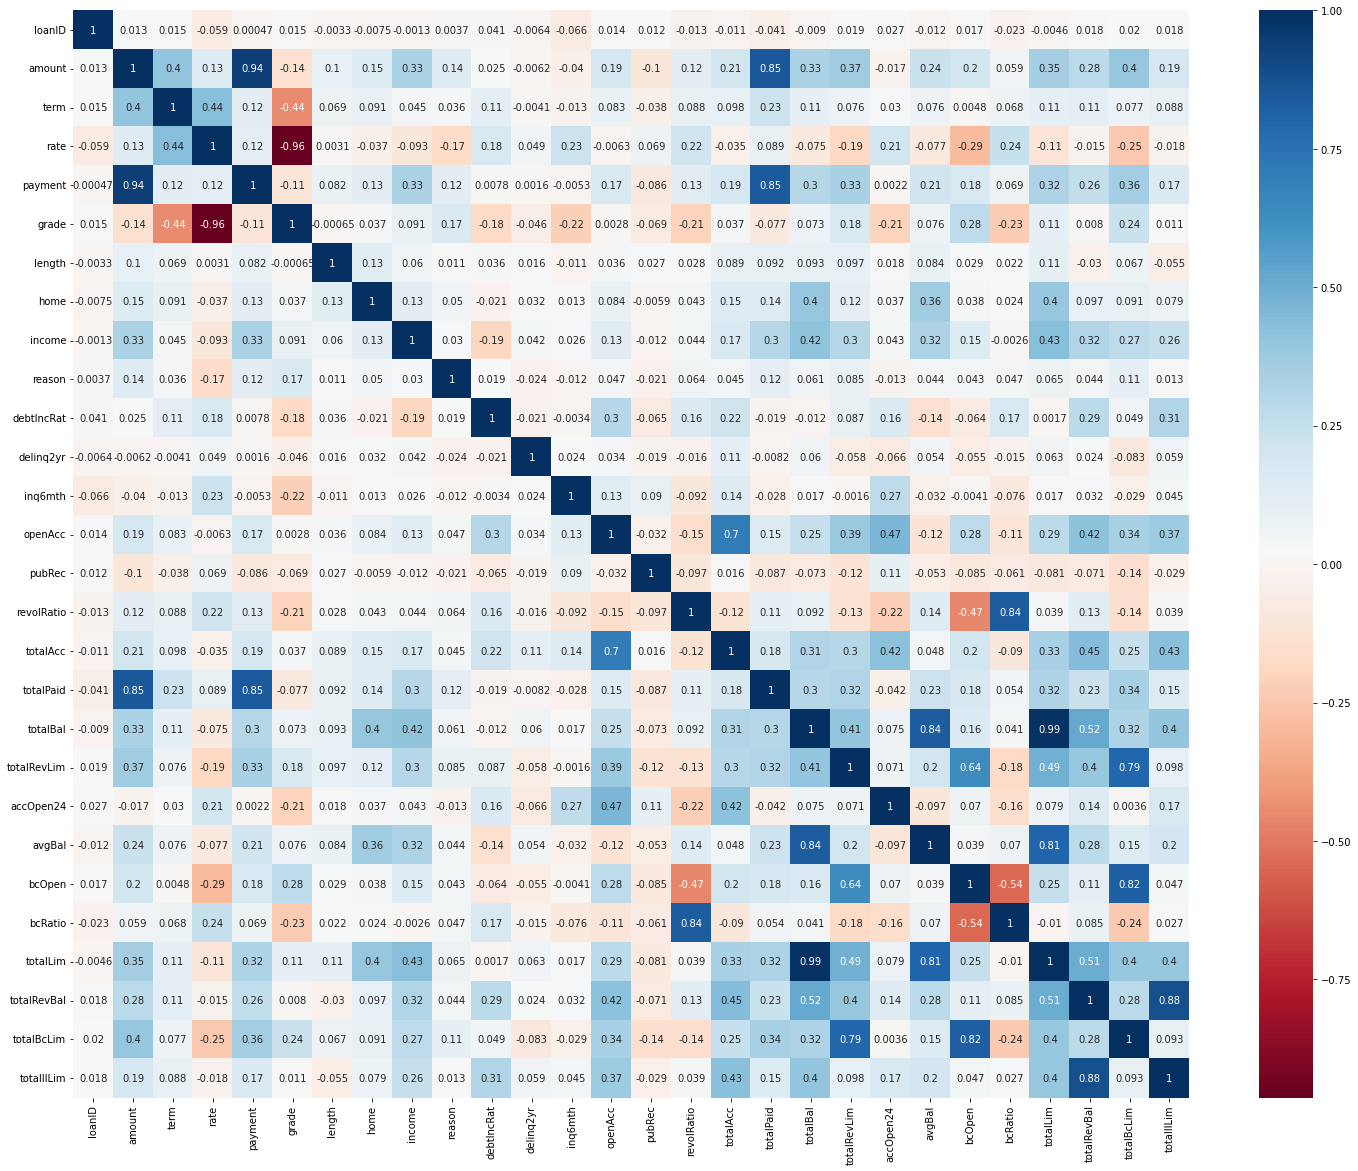

In [19]:
# Let's check the correlation coefficients to see which variables are highly correlated. 

plt.figure(figsize = (25,20))
sns.heatmap(grade_loan.corr(), annot = True, cmap="RdBu")
plt.show()

**Insight**

---

 **From the heatmap we can see no feature columns correlated much with grade our target columns** 

**so prediction from this dataset (regression type model) would not be greatly helpfull for customer.**

Though we will see data insight and will try to find some correlation that some way help to make better and fast decision.


we present this heatmap from A-G (safe to risk) value 7 to 1.

7 means full safe and 1 means full risky 

Here we searching for highly correlated feature(dependent variable) for giving a loan .

* first The total amount repaid to the bank, totalPaid, cannot be used as a predictor variable because it is information that cannot be known before the loan is issue.


now we will see negatively related feature
* when interest rate increase loan fraud  decrease

now we will see positively corelated feature


* amount - payment
* openAcc - totalAcc
* revolRatio - bcRatio
* totalBal - avgBal - totalIlLim - totalLim - avgBal -totalRevBal 
* totalRevLim - totalBcLim - bcOpen




## plotting numerical column with grade(risk factor) 

1. distplot
2. boxplot
3. jointplot

**distplot:**

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

**boxplot**

This kind of plot shows the three quartile values of the distribution along with extreme values.

##  outlier detection



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


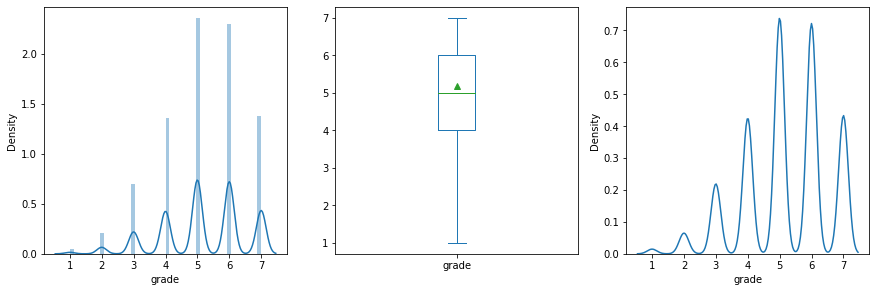

In [20]:
plt.figure(1)
plt.subplot(241)
sns.distplot(grade_loan['grade'])
plt.subplot(242)
grade_loan['grade'].plot.box(figsize = (20,10), showmeans=True)
plt.subplot(243)
sns.kdeplot(grade_loan['grade'])
plt.show()

Insights
* here we can see grade distributed mostly on 5 and 6 or b & c category a(7) and d(4) are equal .
* also mean value is above 5.
* grade between 4 to 7 are high because most people belongs to this point 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


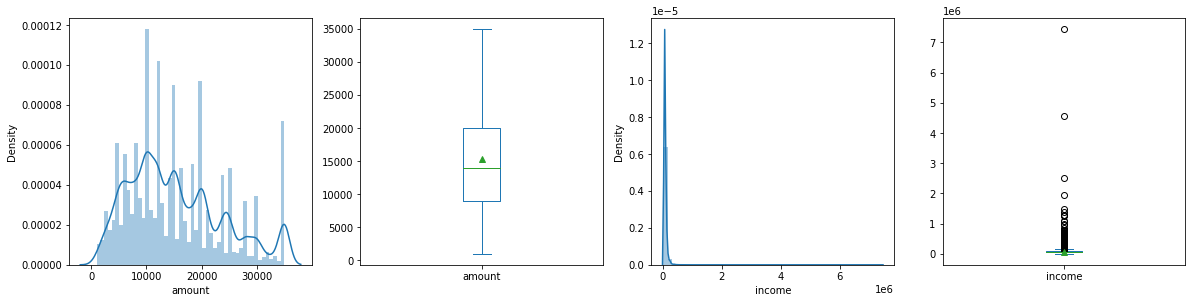

Text(0.5, 1.0, 'payment  income')

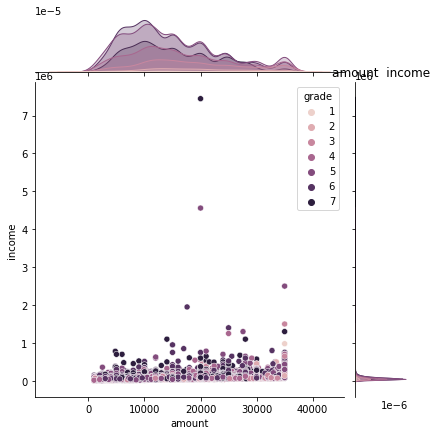

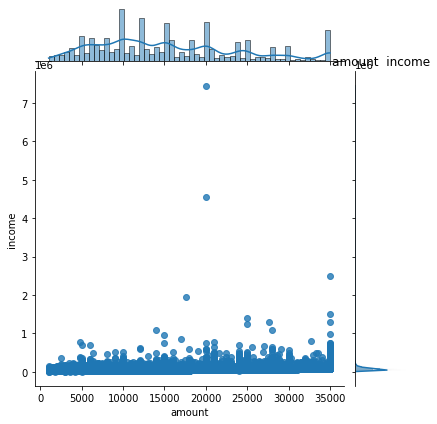

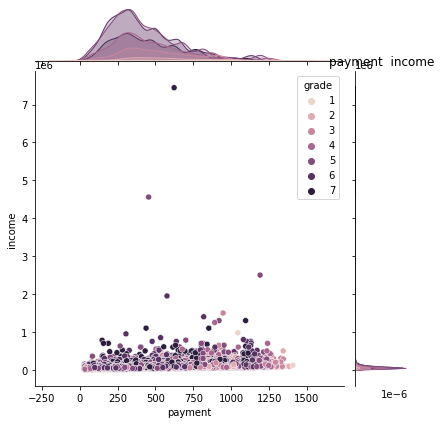

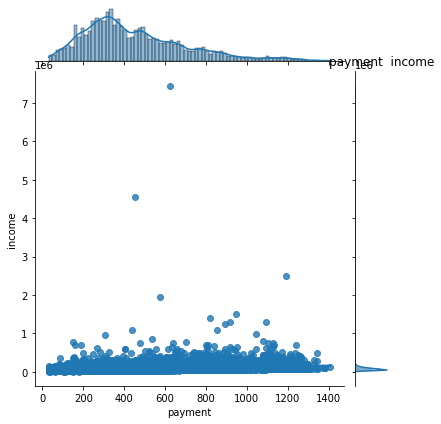

In [21]:
plt.figure(1)
plt.subplot(241)
sns.distplot(grade_loan['amount'])
plt.subplot(242)
grade_loan['amount'].plot.box(figsize = (20,10), showmeans=True)

plt.subplot(243)
sns.distplot(grade_loan['income'])
plt.subplot(244)
grade_loan['income'].plot.box(figsize = (20,10), showmeans=True)
plt.show()

sns.jointplot(x='amount',y='income',data=df_loan, hue="grade")
plt.title('amount  income')
sns.jointplot(x='amount',y='income',data=df_loan, kind="reg")
plt.title('amount  income')

sns.jointplot(x='payment',y='income',data=df_loan, hue="grade")
plt.title('payment  income')
sns.jointplot(x='payment',y='income',data=df_loan, kind="reg")
plt.title('payment  income')

**Insights**

Here we have plotted  income distplot and box plot.

* income have some outlier as expected. Those people who apply for bank loan some of them have higher income than average.   

* people who have high salary they apply for high amount of loan.

Then we have plotted joint plot amount-income and payment-income
* this plotting shows they are saturated to average income .


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


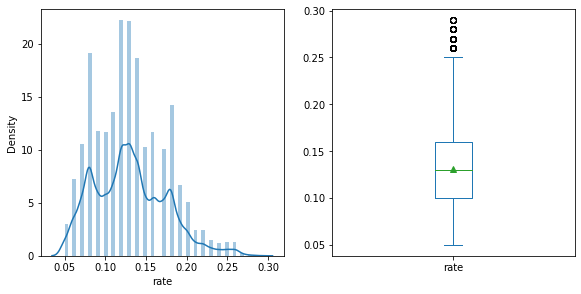

Text(0.5, 1.0, 'interest rate  by grade')

<Figure size 720x432 with 0 Axes>

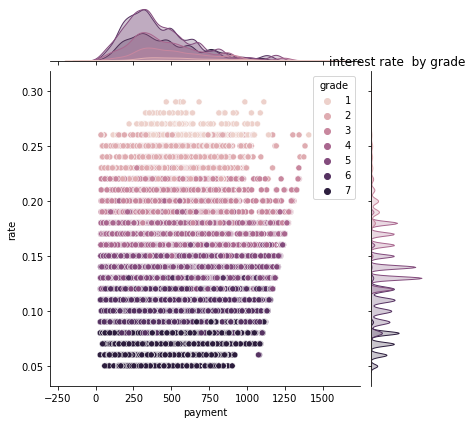

In [22]:
# Here interest rate is normally distributed and almost no outlier.
plt.figure(1)
plt.subplot(241)
sns.distplot(grade_loan['rate'])
plt.subplot(242)
grade_loan['rate'].plot.box(figsize = (20,10),showmeans=True)
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='payment',y='rate',data=df_loan,hue="grade")
plt.title('interest rate  by grade')

**Insights**

as we can see most interest rate are belongs to average value.
* Those who applied for loan if their interest rate cross .15 ,then they might not able to return monthly payment.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

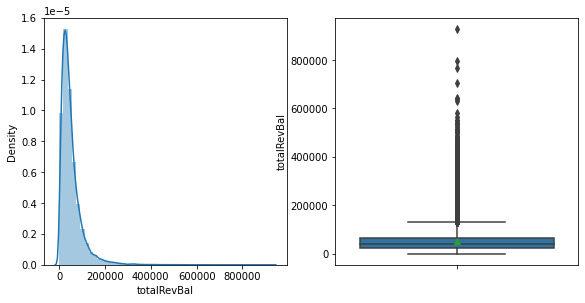

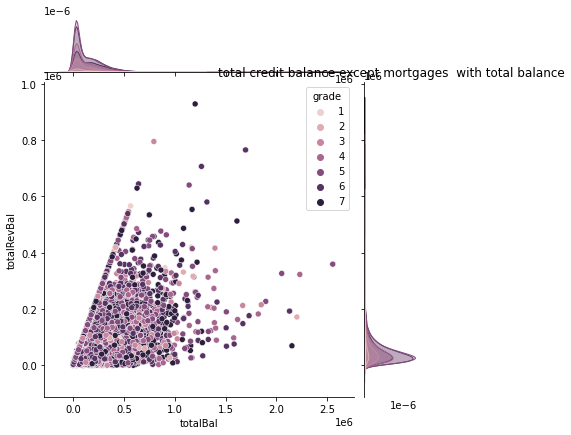

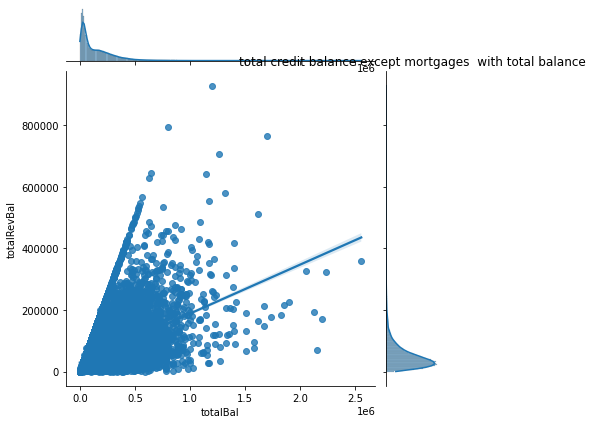

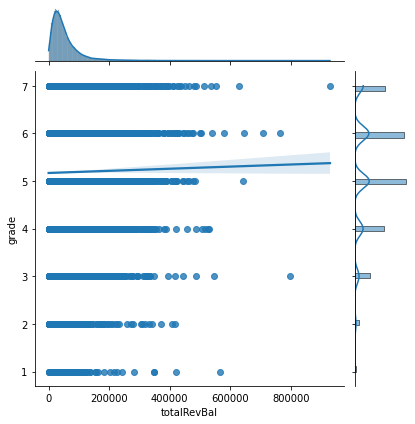

In [23]:
# For total credit balance except mortgages .
# we can see mean value is left shifted. so here have some outlier.
plt.figure(1)
plt.figure(figsize=(20,10))
plt.subplot(241)
sns.distplot(grade_loan['totalRevBal'])
plt.subplot(242)
# grade_loan['totalRevBal'].plot.box(figsize = (20,10))
sns.boxplot(y='totalRevBal',data=grade_loan,showmeans=True)
plt.show()

# plt.figure(figsize=(10,6))
sns.jointplot(x='totalBal',y='totalRevBal',data=df_loan,hue="grade")
plt.title('total credit balance except mortgages  with total balance')

sns.jointplot(x='totalBal',y='totalRevBal',data=df_loan,kind="reg")
plt.title('total credit balance except mortgages  with total balance')

sns.jointplot(x='totalRevBal',y='grade',data=df_loan,kind ='reg')


y=mx+c

**Insights**

For total credit balance except mortgages .
we can see those who applied for loan and have grade5 they can repay money.

and from joint plot we can see totalBal not correlated with totalRevBal.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


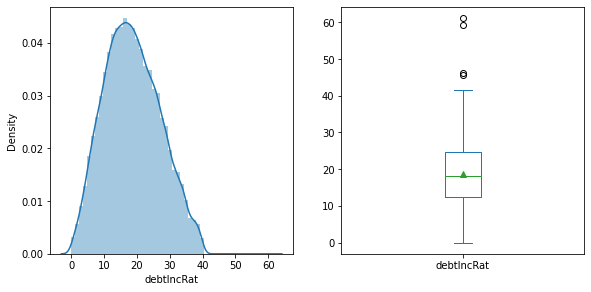

Text(0.5, 1.0, 'total credit limits  with average balance per account')

In [24]:

# The ratio monthly non-mortgage debt payment to monthly income
# is normally distributed and almost no outliers
#.residuals value is high.
plt.figure(1)
plt.subplot(241)
sns.distplot(grade_loan['debtIncRat'])
plt.subplot(242)
grade_loan['debtIncRat'].plot.box(figsize = (20,10),showmeans=True)
plt.show()

# plt.figure(figsize=(10,6))
sns.jointplot(x='totalLim',y='avgBal',data=df_loan, hue="grade")
plt.title('total credit limits  with average balance per account')


sns.jointplot(x='totalLim',y='avgBal',data=df_loan, kind="reg")
plt.title('total credit limits  with average balance per account')

**Insights**



total credit limits and average balence not correlated much.

so we will not use these feature for model building

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '\thow many accounts were opened in the past 24 months  by grade')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 720x432 with 0 Axes>

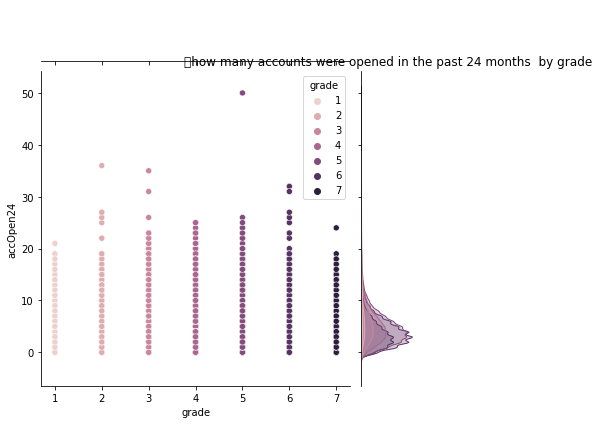

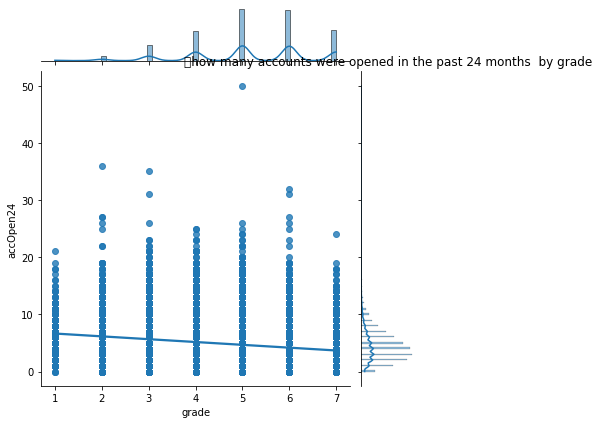

In [25]:
plt.figure(1)
plt.subplot(241)
sns.distplot(grade_loan['accOpen24'])
plt.subplot(242)
grade_loan['accOpen24'].plot.box(figsize = (20,10),showmeans=True)
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='accOpen24',data=grade_loan,hue="grade")
plt.title('	how many accounts were opened in the past 24 months  by grade')
sns.jointplot(x='grade',y='accOpen24',data=grade_loan,kind="reg")
plt.title('	how many accounts were opened in the past 24 months  by grade')

**Insights**

From jointplot no relation between grade with account open in last 24 month. 
so not usefull for model building

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


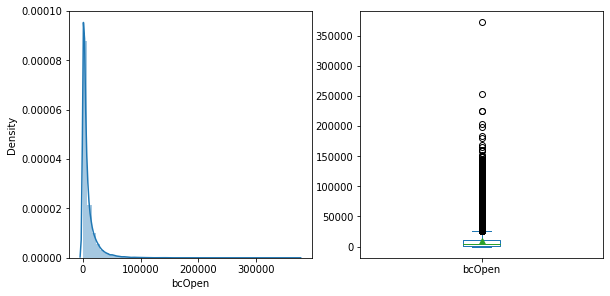

Text(0.5, 1.0, '\ttotal unused credit on credit cards  by grade')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 720x432 with 0 Axes>

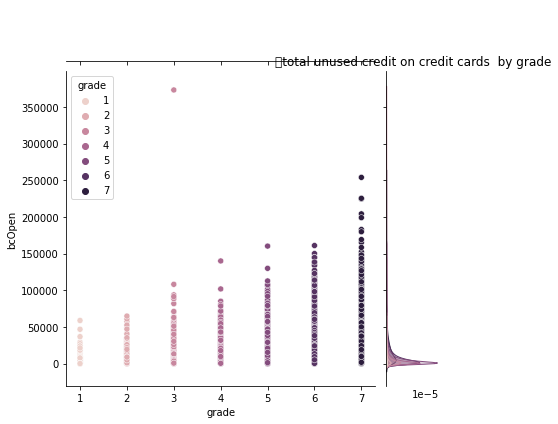

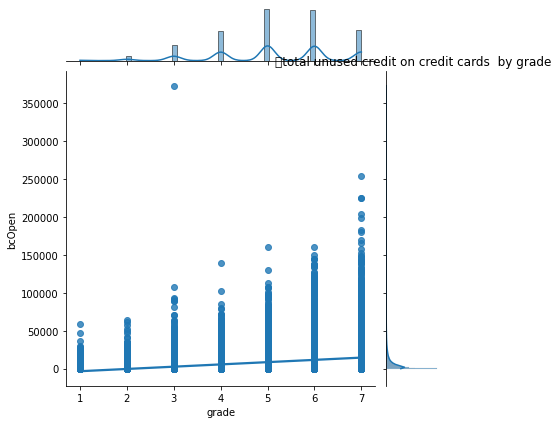

In [26]:
plt.figure(1)
plt.subplot(241)
sns.distplot(grade_loan['bcOpen'])
plt.subplot(242)
grade_loan['bcOpen'].plot.box(figsize = (20,10),showmeans=True)
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='bcOpen',data=grade_loan,hue='grade')
plt.title('	total unused credit on credit cards  by grade')
sns.jointplot(x='grade',y='bcOpen',data=grade_loan,kind='reg')
plt.title('	total unused credit on credit cards  by grade')

**Insights**

bc open means total unused credit on credit cards
not much correlated.

but over 100000 is safe zone

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


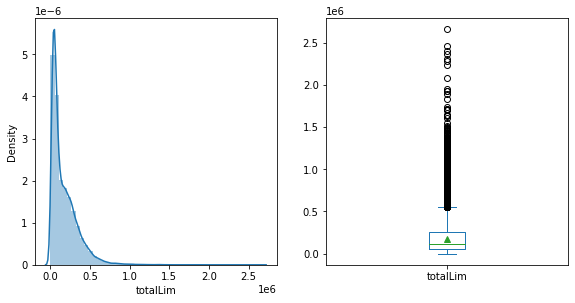

Text(0.5, 1.0, '\ttotal credit limits  by grade')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 720x432 with 0 Axes>

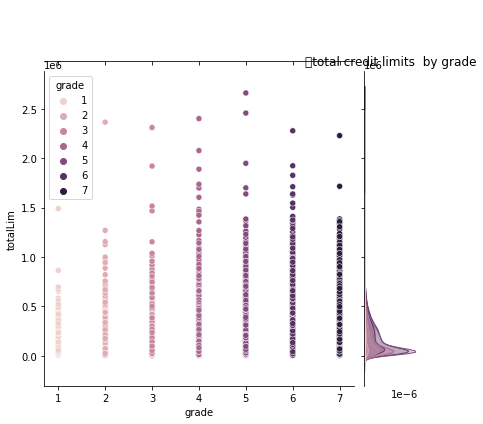

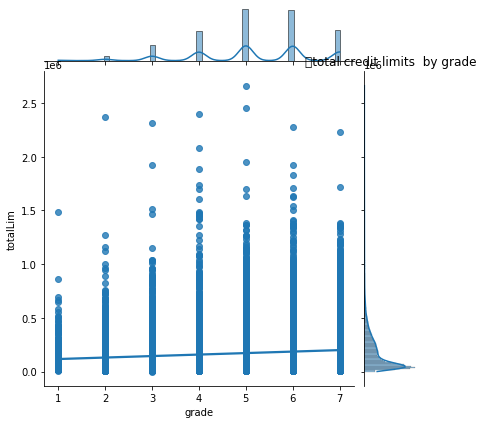

In [27]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df_loan['totalLim'])
plt.subplot(242)
df_loan['totalLim'].plot.box(figsize = (20,10),showmeans=True)
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='totalLim',data=df_loan,hue='grade')
plt.title('	total credit limits  by grade')
sns.jointplot(x='grade',y='totalLim',data=df_loan,kind='reg')
plt.title('	total credit limits  by grade')

**Insights**

have some outliers.
higher value is safe .above 1.5 lakh.

In [28]:
grade_loan.isnull().sum()

loanID         0
amount         0
term           0
rate           0
payment        0
grade          0
length         0
home           0
income         0
reason         0
debtIncRat     0
delinq2yr      0
inq6mth        0
openAcc        0
pubRec         0
revolRatio     0
totalAcc       0
totalPaid      0
totalBal       0
totalRevLim    0
accOpen24      0
avgBal         0
bcOpen         0
bcRatio        0
totalLim       0
totalRevBal    0
totalBcLim     0
totalIlLim     0
dtype: int64

## outlier removing

In [29]:
Q1 = grade_loan.quantile(0.25)
Q3 = grade_loan.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

loanID         330722.750000
amount          11000.000000
term                1.000000
rate                0.060000
payment           317.225000
grade               2.000000
length              7.000000
home                1.000000
income          44000.000000
reason              1.000000
debtIncRat         12.280000
delinq2yr           0.000000
inq6mth             1.000000
openAcc             7.000000
pubRec              0.000000
revolRatio          0.360000
totalAcc           16.000000
totalPaid       12201.487672
totalBal       181207.000000
totalRevLim     26400.000000
accOpen24           4.000000
avgBal          15169.750000
bcOpen           9672.500000
bcRatio            43.700000
totalLim       202086.000000
totalRevBal     42384.750000
totalBcLim      20200.000000
totalIlLim      42169.500000
dtype: float64


In [30]:
grade_loan = grade_loan[~((grade_loan < (Q1 - 1.5 * IQR)) |(grade_loan > (Q3 + 1.5 * IQR))).any(axis=1)]
grade_loan.shape

(19455, 28)

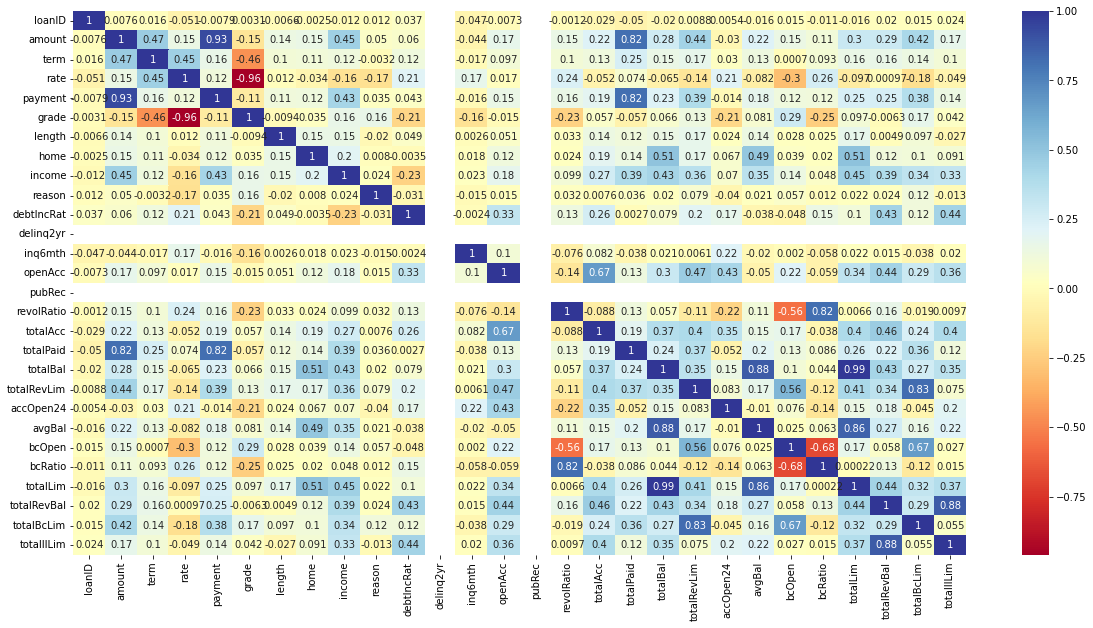

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(grade_loan.corr(),cmap="RdYlBu",annot=True)

## pairplot for numerical value lets see pattern


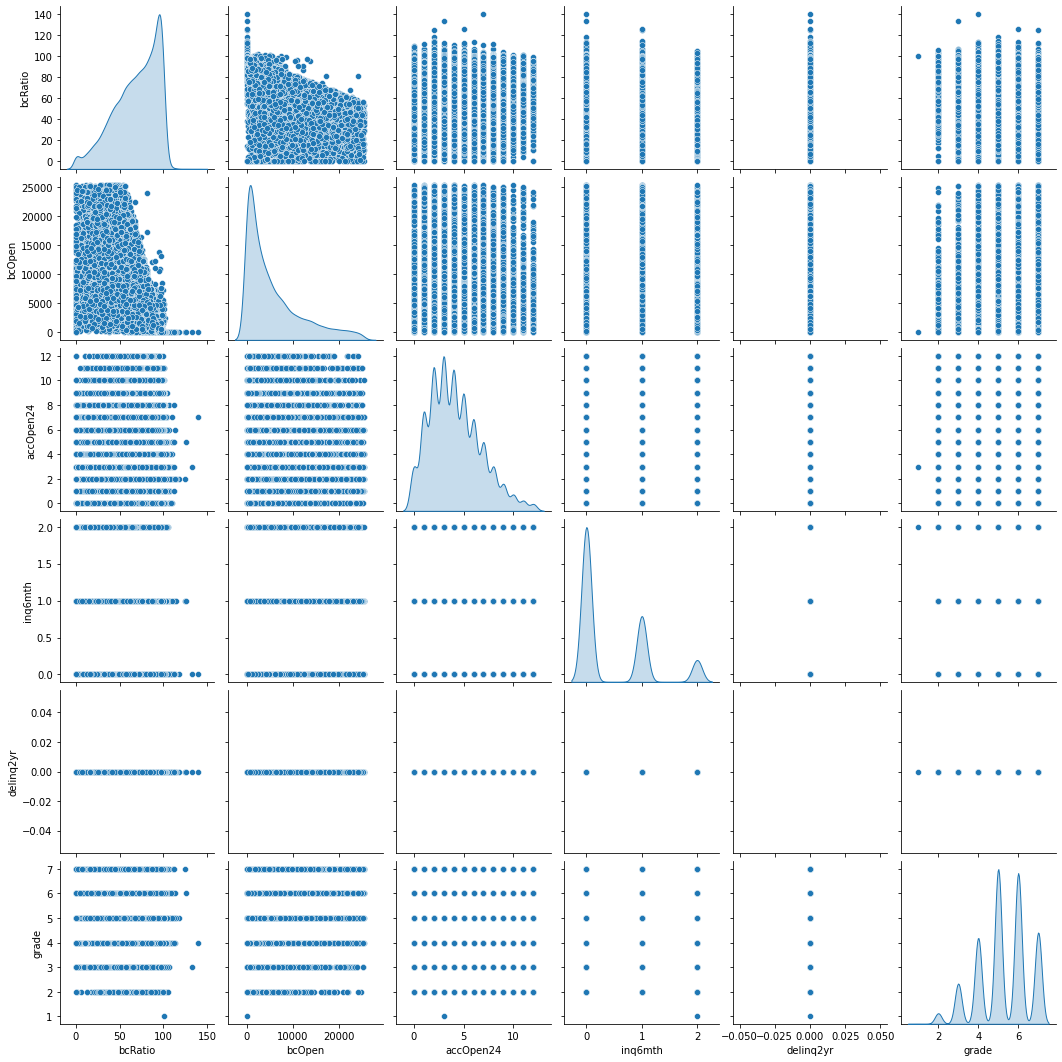

In [32]:
# Create a new dataframe of only numeric variables:

loan_num=grade_loan[['bcRatio','bcOpen','accOpen24','inq6mth','delinq2yr','grade']]
sns.pairplot(loan_num, diag_kind='kde')
plt.show()

Insights
* deliinq2yr + bcRatio upto 7.5 is safe

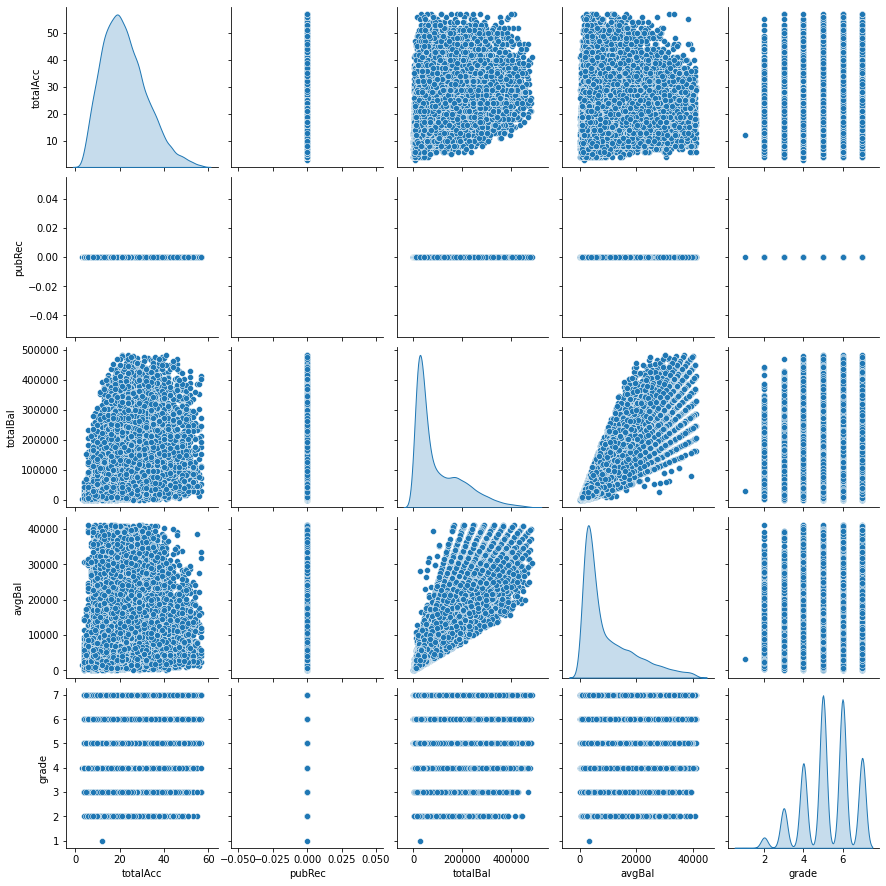

In [33]:
# Create a new dataframe of only numeric variables:

loan_num1=grade_loan[['totalAcc','pubRec','totalBal','avgBal','grade']]
sns.pairplot(loan_num1, diag_kind='kde')
plt.show()

Insights
* totalAcc + openAcc linear relation
* totalBal + avgBal linear relation

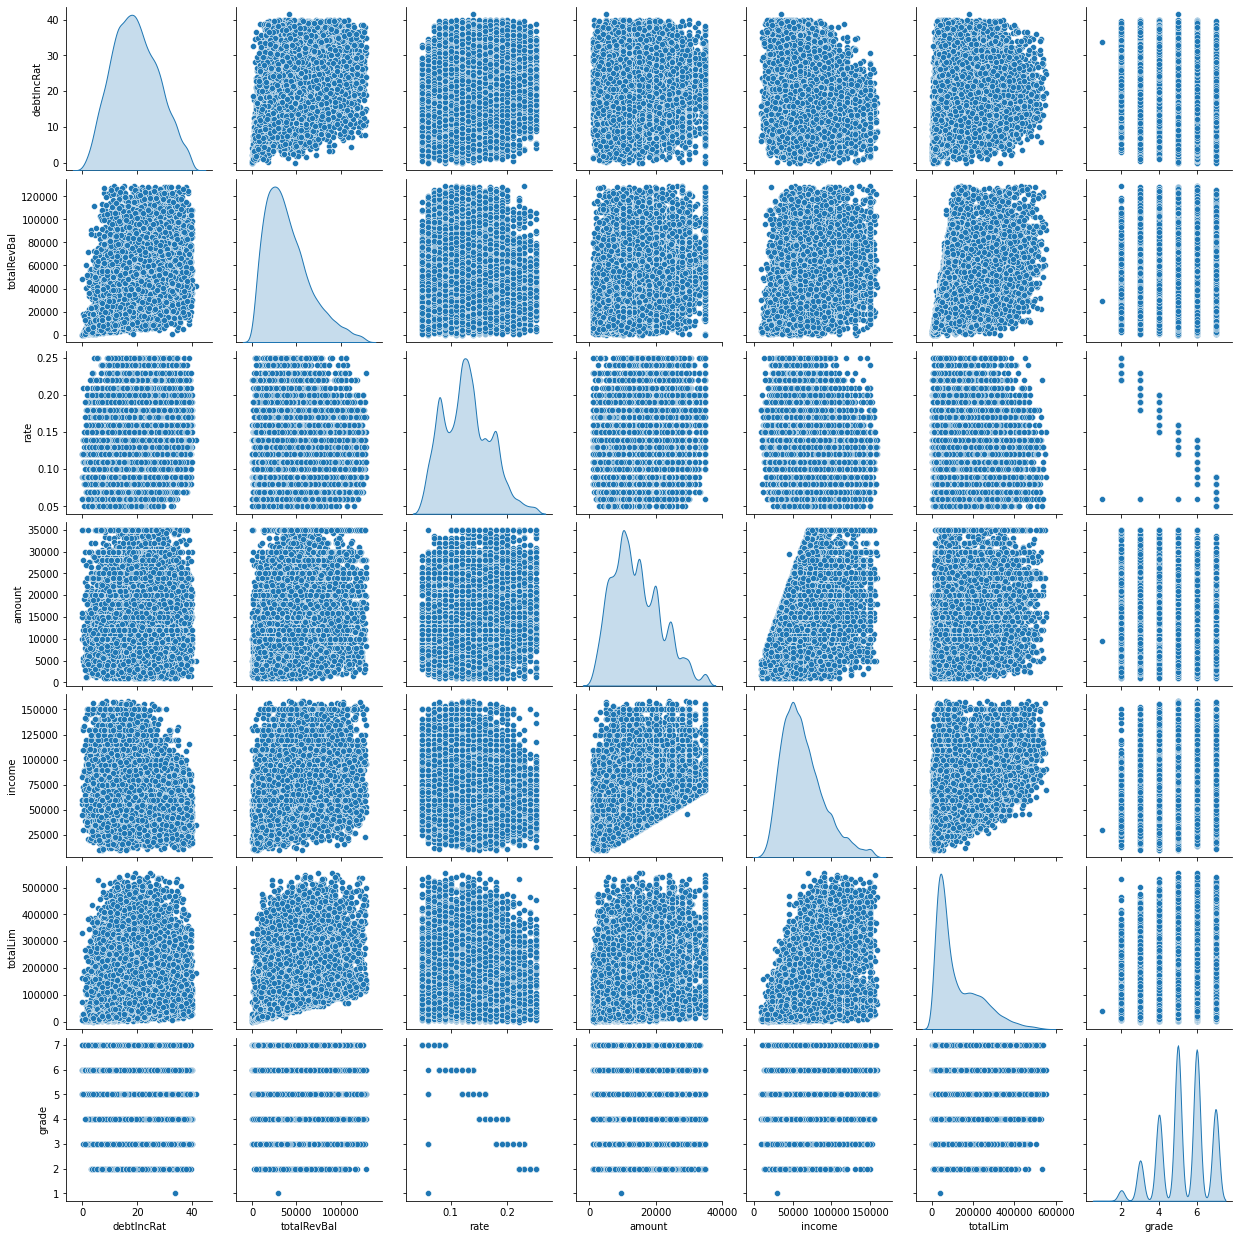

In [34]:
loan_nu1m=grade_loan[['debtIncRat','totalRevBal','rate','amount','income','totalLim','grade']]
sns.pairplot(loan_nu1m, diag_kind='kde')
plt.show()


Insights
* totalRavBal + totalLim

## categorical feature 

1. crosstab bar stacked
2. boxplot


### barplot

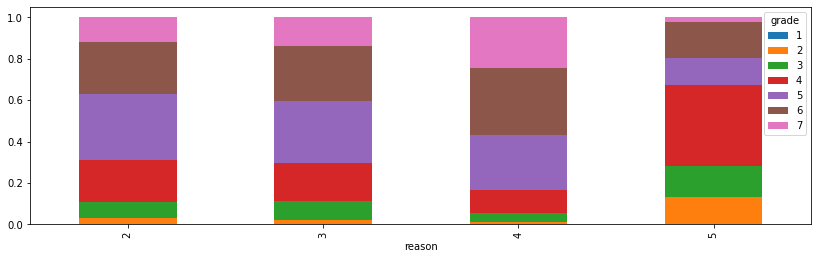

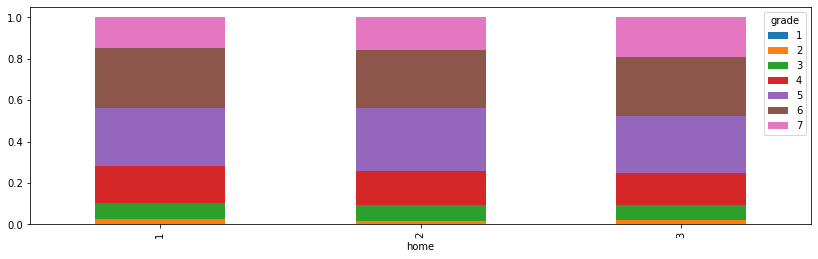

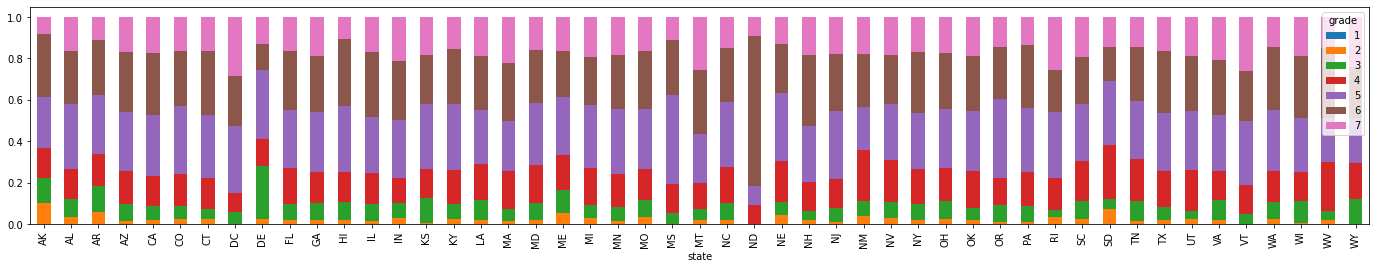

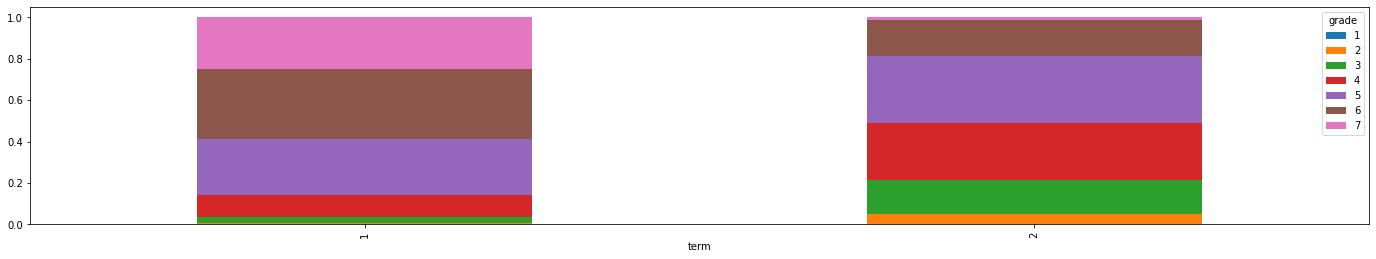

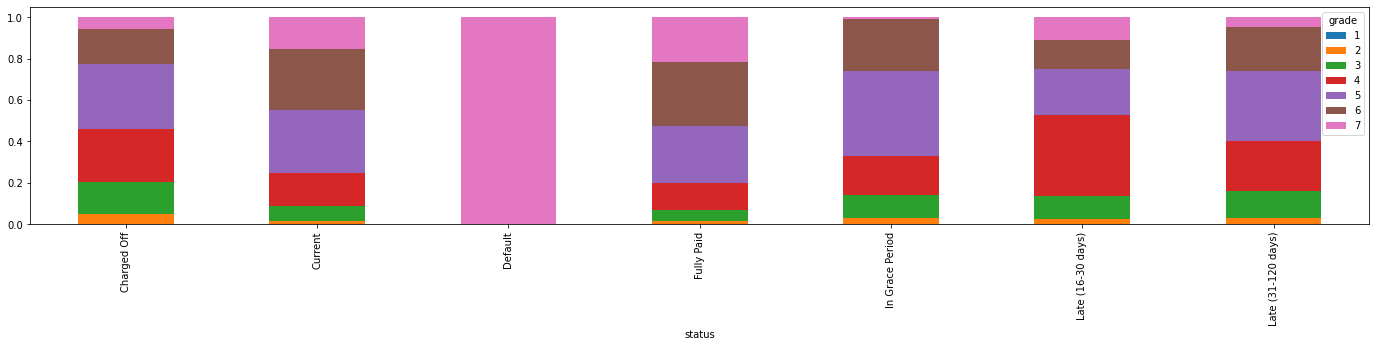

In [35]:
# employment = pd.crosstab(df_loan['employment'], df_loan['grade'])
# employment.div(employment.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
# plt.show()

# length = pd.crosstab(df_loan['length'], df_loan['grade'])
# length.div(length.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
# plt.show()

reason = pd.crosstab(grade_loan['reason'], grade_loan['grade'])
reason.div(reason.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (14,4))
plt.show()

home = pd.crosstab(grade_loan['home'], grade_loan['grade'])
home.div(home.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (14,4))
plt.show()

state = pd.crosstab(df_loan['state'], grade_loan['grade'])
state.div(state.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (24,4))
plt.show()

term = pd.crosstab(grade_loan['term'], grade_loan['grade'])
term.div(term.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (24,4))
plt.show()

status = pd.crosstab(df_loan['status'], grade_loan['grade'])
status.div(status.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (24,4))
plt.show()


**Insights**



### box plot

In [36]:
df_loan.nunique()

loanID         46714
amount          1251
term               2
rate              25
payment        14592
grade              7
employment     21203
length            11
home               3
income          4288
verified           3
status             7
reason            13
state             49
debtIncRat      3912
delinq2yr         16
inq6mth            7
openAcc           58
pubRec            16
revolRatio       121
totalAcc         102
totalPaid      44627
totalBal       42500
totalRevLim     2850
accOpen24         33
avgBal         23515
bcOpen         19018
bcRatio         1111
totalLim       40431
totalRevBal    37441
totalBcLim      1839
totalIlLim     31668
dtype: int64

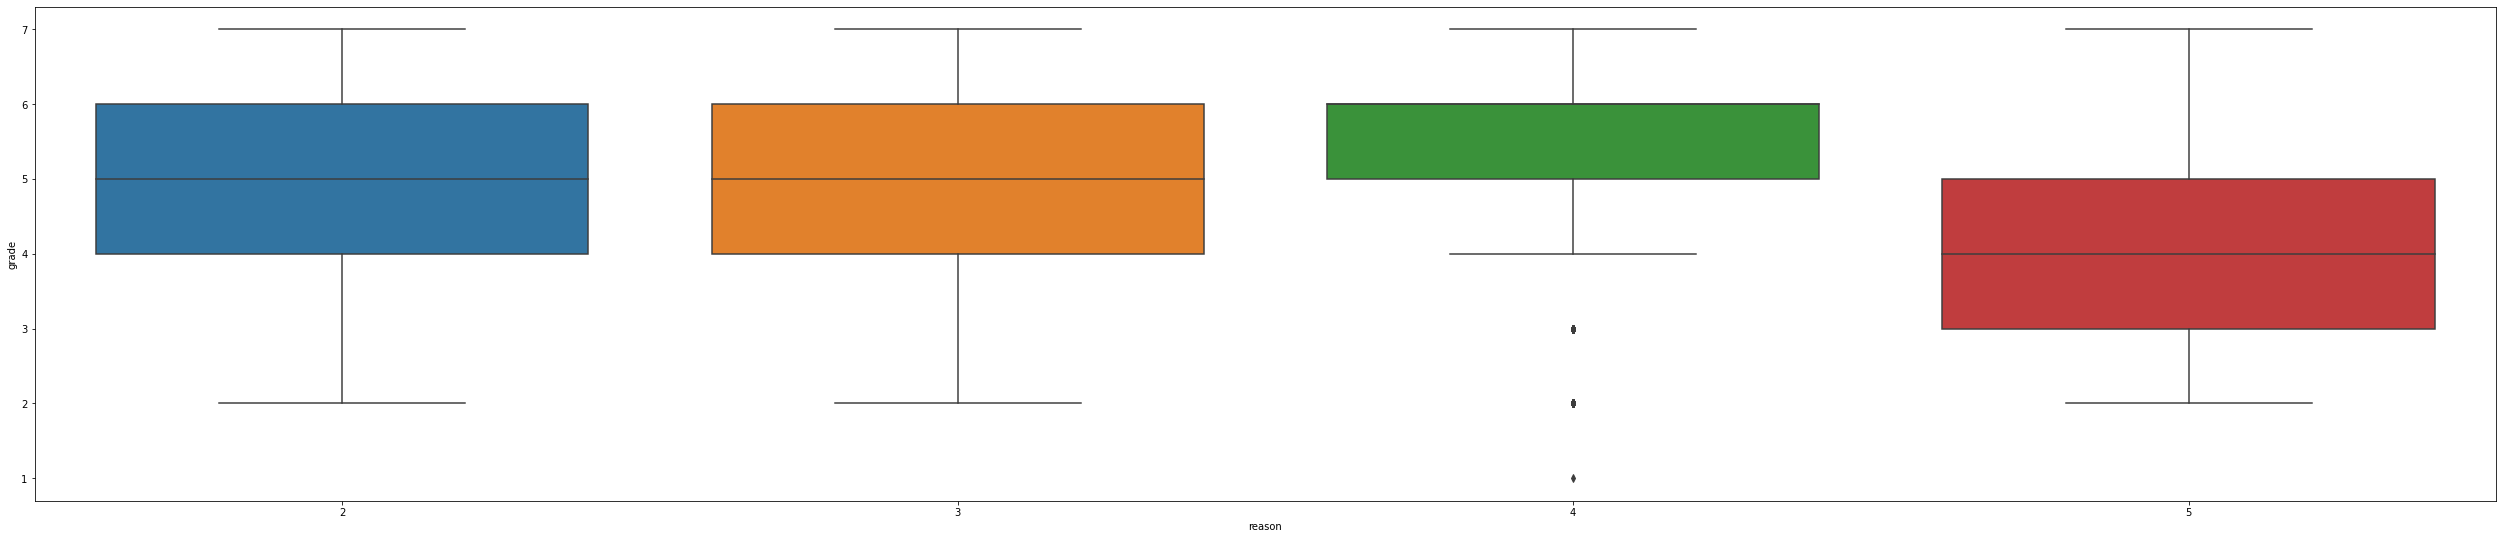

In [37]:
plt.figure(figsize=(150, 20))
plt.subplot(2,3,1)
sns.boxplot(x = 'reason', y = 'grade', data = grade_loan)

plt.show()

Insights
* credit card loan is safe
* house & small business loan is risky

In [38]:
# plt.figure(figsize=(150, 20))
# plt.subplot(2,3,2)
# sns.boxplot(x = 'state', y = 'grade', data = grade_loan)
# plt.show()

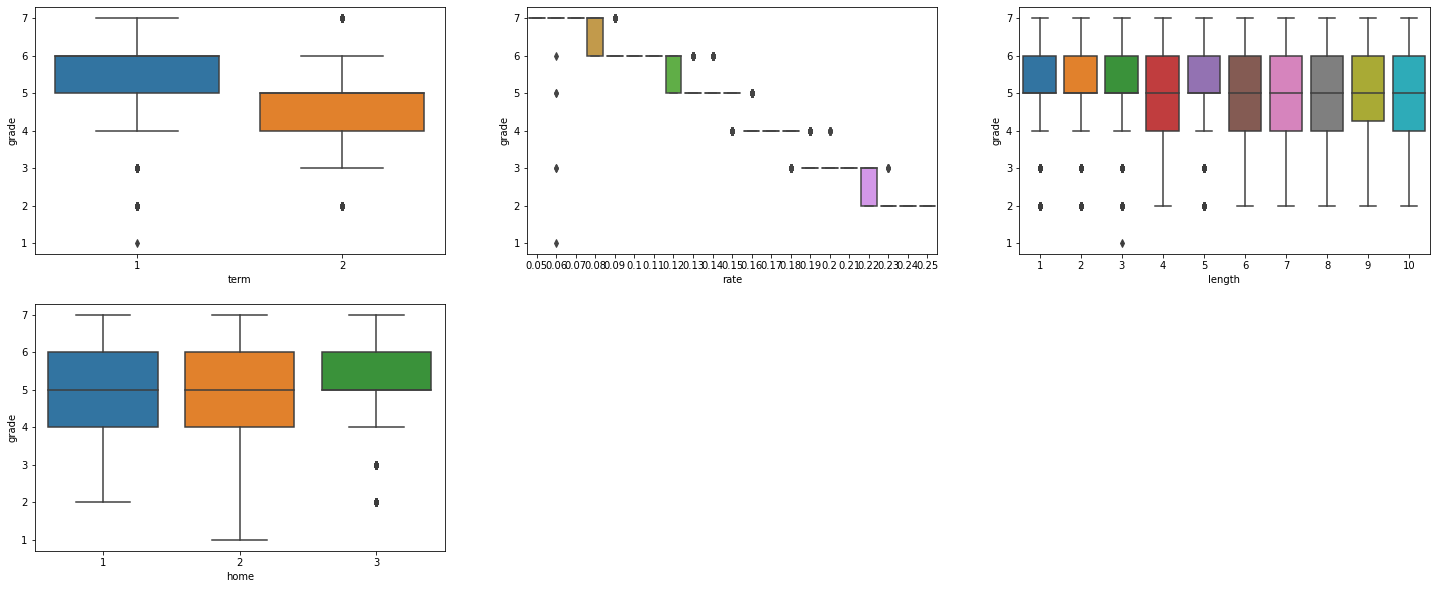

In [39]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'grade' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'term', y = 'grade', data = grade_loan)

plt.subplot(2,3,2)
sns.boxplot(x = 'rate', y = 'grade', data = grade_loan)

plt.subplot(2,3,3)
sns.boxplot(x = 'length', y = 'grade', data = grade_loan)

plt.subplot(2,3,4)
sns.boxplot(x = 'home', y = 'grade', data = grade_loan)

# plt.subplot(2,3,5)
# sns.boxplot(x = 'verified', y = 'grade', data = grade_loan)



Insights

There were 9 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (grade) .

The inference that We could derive were:
* term: lower term more safe than long loke 60 months
* rate : till mean value .13 is safe or D type risk
* length : job length have not have any contribution for fraud
* home: home also have no contribution to frauds
* verified: it denotes data is varified but all types are belong to safe range

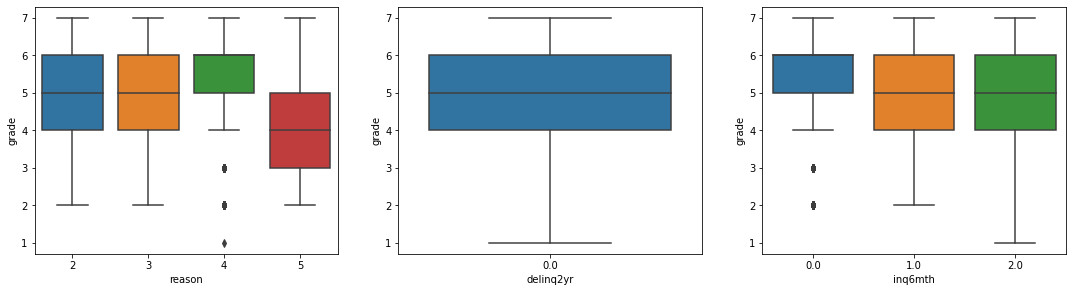

In [40]:
plt.figure(figsize=(25, 10))

plt.subplot(2,4,1)
sns.boxplot(x = 'reason', y = 'grade', data = grade_loan)

plt.subplot(2,4,2)
sns.boxplot(x = 'delinq2yr', y = 'grade', data = grade_loan)

plt.subplot(2,4,3)
sns.boxplot(x = 'inq6mth', y = 'grade', data = grade_loan)
plt.show()

# Predictive Analysis

In [41]:
from sklearn.preprocessing import MinMaxScaler
# scl = preprocessing.StandardScaler() #instance of preprocessing
nms = MinMaxScaler()
fields =['income','totalRevBal','debtIncRat','avgBal','reason','term','totalBal','openAcc','pubRec','totalAcc','delinq2yr','accOpen24','bcRatio','totalLim'
          ,	'amount','rate','inq6mth','payment','length','home',	'openAcc',	'revolRatio','totalRevLim',	'bcOpen','totalBcLim']

# grade_loan = pd.DataFrame(scl.fit_transform(grade_loan[fields]), columns = fields)
grade_loan = pd.DataFrame(nms.fit_transform(grade_loan[fields]), columns = fields)
grade_loan['grade']=df_loan['grade']
grade_loan = grade_loan.dropna() 

## regressoin analysis

In [42]:
# credit_score = grade_loan['income'] * 0.35 + grade_loan['totalRevBal'] * 0.25 + grade_loan['avgBal'] * 0.25 + grade_loan['reason'] * 0.20 + grade_loan['term'] * 0.5 

In [43]:
credit_score1=grade_loan['income'] * 0.25 + grade_loan['totalRevBal'] * 0.15 + grade_loan['avgBal'] * 0.15 + grade_loan['reason'] * 0.20 + grade_loan['term'] * 0.10 + grade_loan['totalBal'] * 0.10 + grade_loan['debtIncRat'] * 0.05  

In [44]:
credit_score1_v=grade_loan[['income','totalRevBal','avgBal','reason','term','totalBal','debtIncRat']]

In [45]:
grade_loan['Credit_score'] = credit_score1

In [46]:
grade_loan['Credit_score'].describe()

count    18208.000000
mean         0.336297
std          0.122670
min          0.028525
25%          0.242736
50%          0.325570
75%          0.417442
max          0.817768
Name: Credit_score, dtype: float64

In [47]:
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix

# reg = linear_model.LinearRegression()
# reg.fit(grade_loan[['Credit_score']], grade_loan['grade'])

In [48]:
grade_loan.isnull().sum()

income          0
totalRevBal     0
debtIncRat      0
avgBal          0
reason          0
term            0
totalBal        0
openAcc         0
pubRec          0
totalAcc        0
delinq2yr       0
accOpen24       0
bcRatio         0
totalLim        0
amount          0
rate            0
inq6mth         0
payment         0
length          0
home            0
openAcc         0
revolRatio      0
totalRevLim     0
bcOpen          0
totalBcLim      0
grade           0
Credit_score    0
dtype: int64

In [49]:
grade_loan = grade_loan.dropna() 

In [50]:
grade_loan.head()

income  totalRevBal  debtIncRat    avgBal    reason  term  totalBal  \
0  0.270041     0.373090    0.724795  0.106147  0.666667   0.0  0.099270   
1  0.270270     0.091957    0.210806  0.538217  0.333333   0.0  0.549167   
2  0.364865     0.065800    0.123975  0.444388  0.333333   1.0  0.264492   
3  0.662162     0.195179    0.282200  0.026555  0.666667   0.0  0.051932   
4  0.202703     0.618758    0.557164  0.148931  0.666667   1.0  0.164636   

    openAcc  pubRec  totalAcc  delinq2yr  accOpen24   bcRatio  totalLim  \
0  0.416667     0.0  0.222222        0.0   0.666667  0.683084  0.108423   
1  0.458333     0.0  0.222222        0.0   0.333333  0.267666  0.536970   
2  0.291667     0.0  0.351852        0.0   0.250000  0.416845  0.242252   
3  1.000000     0.0  0.759259        0.0   0.666667  0.555318  0.126593   
4  0.500000     0.0  0.518519        0.0   0.166667  0.676660  0.168634   

     amount  rate  inq6mth   payment    length  home   openAcc  revolRatio  \
0  0.205882  0.45      0.0  0.233852  0.222222   0.5  0.416667    0.436508   
1  0.294118  0.25      1.0  0.314259  1.000000   1.0  0.458333    0.285714   
2  0.323529  0.35      0.0  0.228813  1.000000   1.0  0.291667    0.460317   
3  0.264706  0.45      1.0  0.299929  0.000000   0.5  1.000000    0.325397   
4  0.558824  0.40      0.0  0.414802  0.888889   0.5  0.500000    0.698413   

   totalRevLim    bcOpen  totalBcLim  grade  Credit_score  
0     0.097622  0.001691    0.017153    5.0      0.318896  
1     0.414268  0.777122    0.542024    6.0      0.294217  
2     0.178974  0.232240    0.243568    4.0      0.367059  
3     0.710889  0.162418    0.319039    5.0      0.351437  
4     0.246558  0.037645    0.317324    6.0      0.443484

In [51]:
grade_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18208 entries, 0 to 19454
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   income        18208 non-null  float64
 1   totalRevBal   18208 non-null  float64
 2   debtIncRat    18208 non-null  float64
 3   avgBal        18208 non-null  float64
 4   reason        18208 non-null  float64
 5   term          18208 non-null  float64
 6   totalBal      18208 non-null  float64
 7   openAcc       18208 non-null  float64
 8   pubRec        18208 non-null  float64
 9   totalAcc      18208 non-null  float64
 10  delinq2yr     18208 non-null  float64
 11  accOpen24     18208 non-null  float64
 12  bcRatio       18208 non-null  float64
 13  totalLim      18208 non-null  float64
 14  amount        18208 non-null  float64
 15  rate          18208 non-null  float64
 16  inq6mth       18208 non-null  float64
 17  payment       18208 non-null  float64
 18  length        18208 non-nu

In [52]:
x = grade_loan[['Credit_score']]
y = grade_loan[['grade']]
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [54]:
lr.fit(x_train, y_train)

LinearRegression()

In [55]:
lr.intercept_

array([5.2270827])

In [56]:
lr.coef_

array([[-0.09822363]])

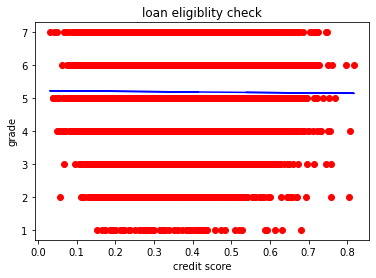

In [85]:
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "blue")
plt.title("loan eligiblity check")
plt.xlabel("credit score")
plt.ylabel("grade")
plt.show()

* giving all feature same importance 

Text(0.5, 1.0, '\ttotal unused credit on credit cards  by grade')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


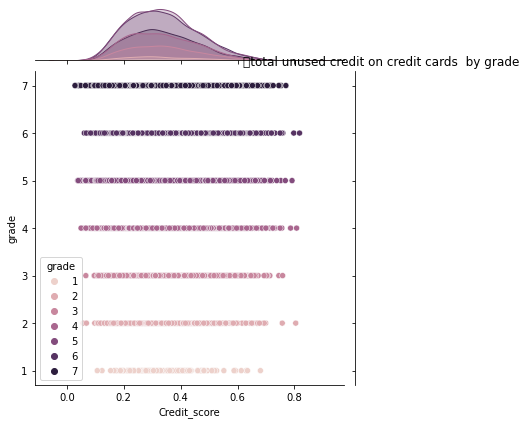

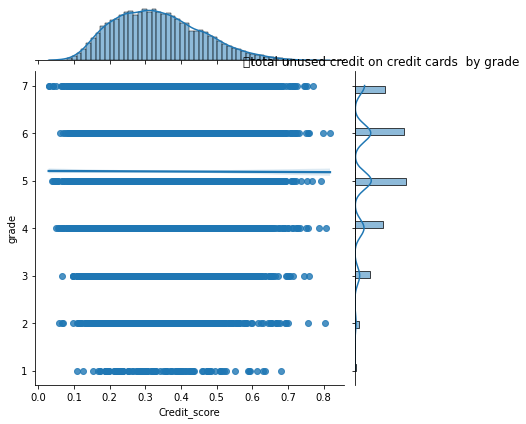

In [90]:
sns.jointplot(x='Credit_score',y='grade',data=grade_loan,hue='grade')
plt.title('	total unused credit on credit cards  by grade')
sns.jointplot(x='Credit_score',y='grade',data=grade_loan,kind='reg')
plt.title('	total unused credit on credit cards  by grade')

In [59]:
credit_score2= grade_loan['income'] +grade_loan['pubRec'] + grade_loan['totalRevBal'] +grade_loan['debtIncRat'] +grade_loan['avgBal'] + grade_loan['reason']+ grade_loan['term']+ grade_loan['totalBal'] +grade_loan['accOpen24']+ grade_loan['bcRatio']+ grade_loan['totalLim'] + grade_loan['totalAcc']+ grade_loan['delinq2yr']

In [60]:
credit_score2_v= grade_loan[['income','pubRec','totalRevBal','debtIncRat','avgBal','reason','term','totalBal','accOpen24','bcRatio','totalLim','totalAcc','delinq2yr']]

In [61]:
grade_loan['Credit_score2'] = credit_score2

In [62]:
x2=grade_loan[['Credit_score2']]
y2 = grade_loan[['grade']]
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=102)

In [63]:
lr_2 = LinearRegression()


In [64]:
lr_2.fit(x_train2, y_train2)

LinearRegression()

In [65]:
print(lr_2.intercept_)
print(lr_2.coef_)

[5.19973946]
[[-0.00409635]]


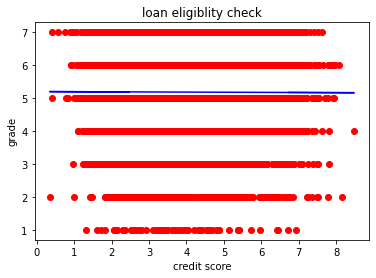

In [66]:
plt.scatter(x_train2, y_train2, color = "red")
plt.plot(x_train2, lr_2.predict(x_train2), color = "blue")
plt.title("loan eligiblity check")
plt.xlabel("credit score")
plt.ylabel("grade")
plt.show()

### calculating vif 

**Model Validation**

After building the model it is important for us to validate it's performance. We can evaluate a model by looking at it's coefficient of determination ( R2 ), F-test, t-test, and also residuals. Before we continue we will rebuild our model using the statsmodel library with the OLS() function. Then we will print the model summary using the summary() function on the model. The model summary contains lots of important value we can use to evaluate our model.

#### For first train features

In [67]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

X = sm.add_constant(credit_score1_v) # adding a constant

olsmod = sm.OLS(grade_loan['grade'], X).fit()
print(olsmod.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.043
Date:                Wed, 29 Jun 2022   Prob (F-statistic):              0.398
Time:                        11:54:11   Log-Likelihood:                -30689.
No. Observations:               18208   AIC:                         6.139e+04
Df Residuals:                   18200   BIC:                         6.146e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.1832      0.045    114.760      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [68]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.000400872557061116


In [69]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 1.0426866328157023
Probability of observing value at least as high as F-statistic: 0.398491141150764


In [70]:
print(olsmod.pvalues)

const          0.000000
income         0.418504
totalRevBal    0.041830
avgBal         0.229161
reason         0.651665
term           0.330598
totalBal       0.107882
debtIncRat     0.778308
dtype: float64


In [71]:
# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = credit_score1_v.columns
vif['VIF'] = [variance_inflation_factor(credit_score1_v.values, i) for i in range(credit_score1_v.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5     totalBal  11.13
2       avgBal   9.81
1  totalRevBal   6.69
6   debtIncRat   6.02
0       income   5.55
3       reason   5.14
4         term   1.57

* check residuals for this train data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

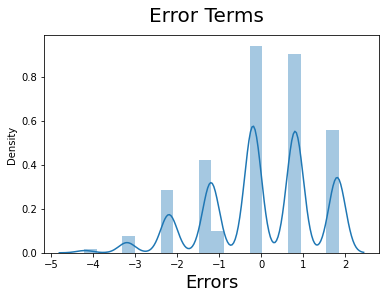

In [72]:

y_train_res = lr.predict(x_train)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [73]:
from sklearn.metrics import r2_score
r2_score(y_true = y_train, y_pred = y_train_res)

8.601495481164179e-05

* **another test**

now adding all 14 column for checking **VIF** value


In [74]:
X_train_lm2 = sm.add_constant(credit_score2_v)
lr_1 = sm.OLS(grade_loan['grade'], X_train_lm2).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8644
Date:                Wed, 29 Jun 2022   Prob (F-statistic):              0.575
Time:                        11:54:12   Log-Likelihood:                -30688.
No. Observations:               18208   AIC:                         6.140e+04
Df Residuals:                   18196   BIC:                         6.149e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.2157      0.054     96.479      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


In [75]:
# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = credit_score2_v.columns
vif['VIF'] = [variance_inflation_factor(credit_score2_v.values, i) for i in range(credit_score2_v.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Features     VIF
10     totalLim  135.01
7      totalBal  130.71
4        avgBal   11.21
3    debtIncRat   10.62
9       bcRatio    8.50
0        income    8.30
11     totalAcc    7.61
2   totalRevBal    7.28
5        reason    5.82
8     accOpen24    4.11
6          term    1.58
1        pubRec     NaN
12    delinq2yr     NaN

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

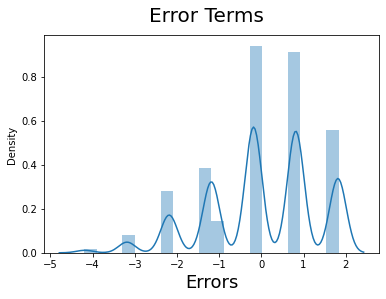

In [76]:
y_train_res2 = lr_2.predict(x_train2)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train2 - y_train_res2), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [77]:

from sklearn.metrics import r2_score
r2_score(y_true = y_train2, y_pred = y_train_res2)

1.479657959357894e-05

## prediction

* **for model 1**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

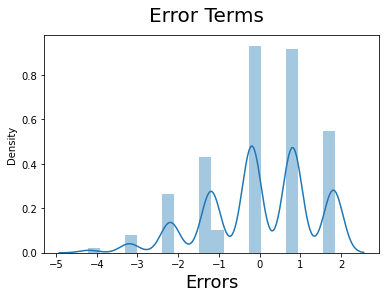

In [78]:
y_test_pred = lr.predict(x_test)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [79]:

from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_test_pred)

-0.0003193684360993654

In [80]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(lr, x_train, y_train, cv=3)

In [81]:
r2_score(y_true = y_train, y_pred = y_pred)

-0.00043804193073615494

* **for model 2**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

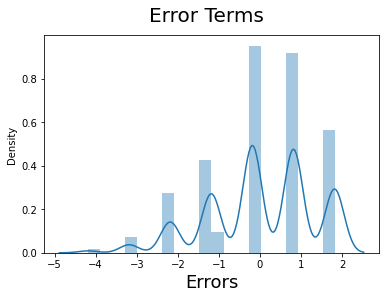

In [82]:
y_test_pred2 = lr_2.predict(x_test2)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test2 - y_test_pred2), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [83]:

from sklearn.metrics import r2_score
r2_score(y_true = y_test2, y_pred = y_test_pred2)

-0.0003349884612755538